# Exploratory Data Analysis Wine Quality dataset
##Agenda
    * Loading the dataset
    * Data wrangling for missing variables.
    * Data transformation.
    * Data visualization
    * Answering the main questions:

In [11]:
import pandas as pd

In [12]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [ ]:
df_red.columns

In [14]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
df_red.iloc[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,5


In [17]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#Analysis of Red Wine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


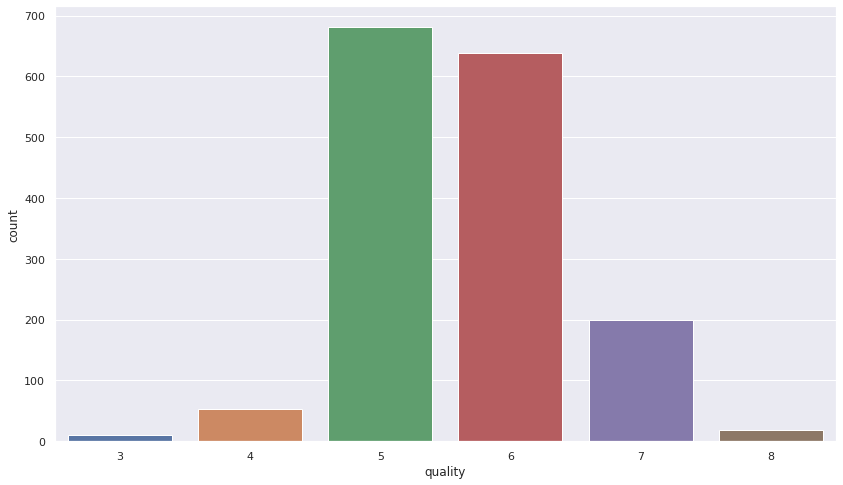

In [19]:

import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df_red['quality'])

In [20]:
sns.pairplot(df_red)

Output hidden; open in https://colab.research.google.com to view.

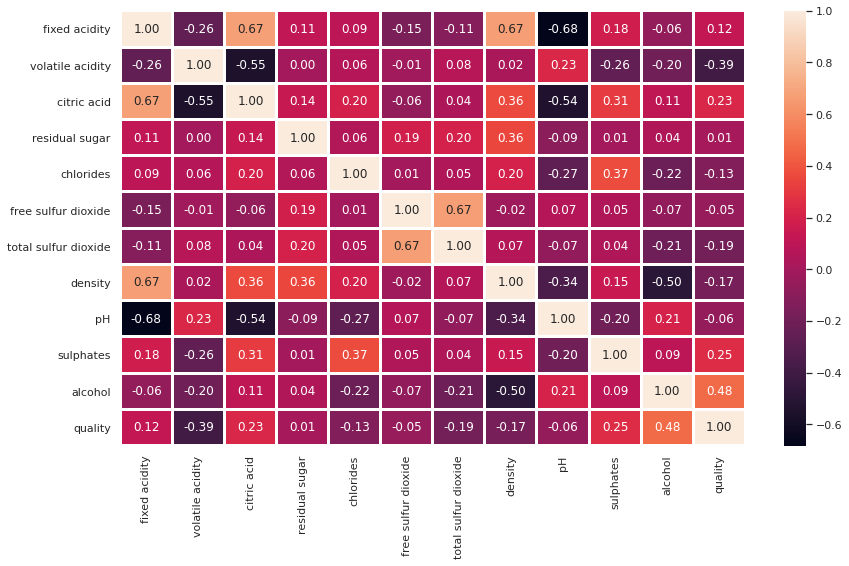

In [21]:

sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


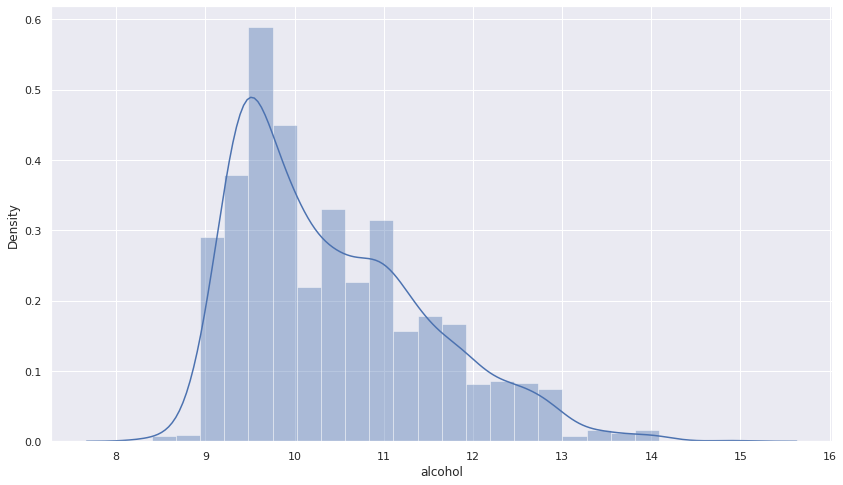

In [22]:
sns.distplot(df_red['alcohol'])

In [23]:
from scipy.stats import skew

skew(df_red['alcohol'])

0.8600210646566755

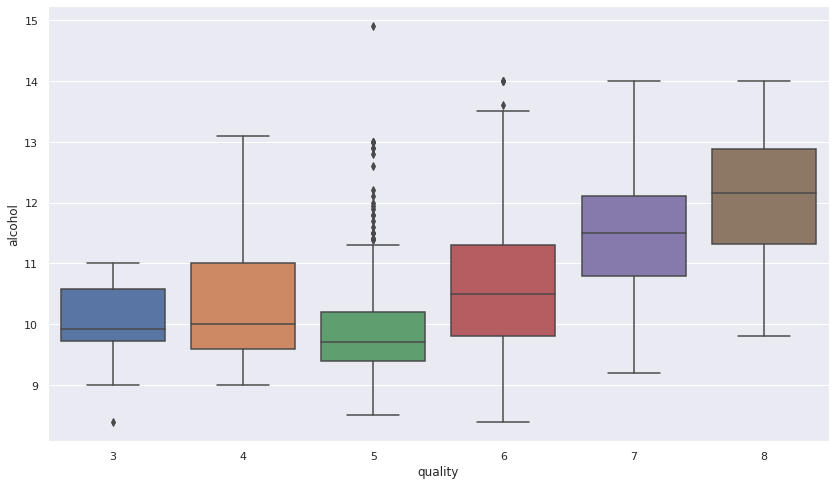

In [24]:
sns.boxplot(x='quality', y='alcohol', data = df_red)

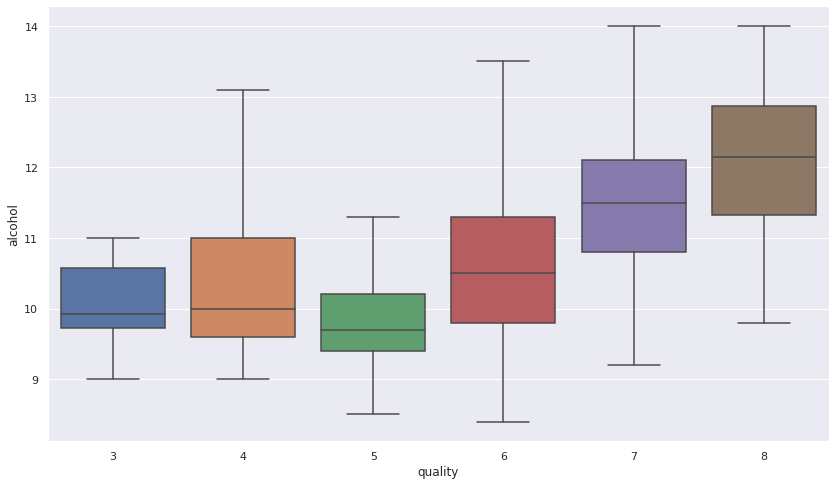

In [25]:

sns.boxplot(x='quality', y='alcohol', data = df_red, showfliers=False)

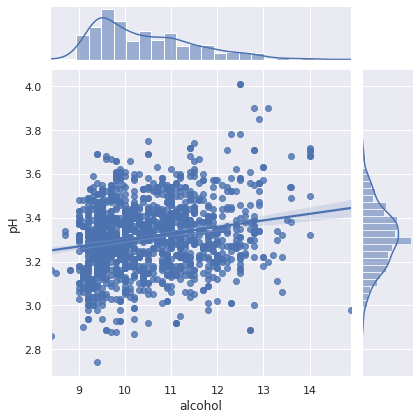

In [26]:
sns.jointplot(x='alcohol',y='pH',data=df_red, kind='reg')

In [27]:
from scipy.stats import pearsonr

def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))

In [28]:

get_correlation('alcohol','pH', df_red)

Correlation between alcohol and pH is 0.20563250850549825
P-value of this correlation is 9.96449774146556e-17


In [29]:

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#White wine analysis

In [30]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [31]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


In [32]:
# Let us add new attribute called wine_category  to the both dataframe

df_white['wine_category'] = 'white'
df_red['wine_category'] = 'red'

In [33]:
print('RED WINE: List of "quality"', sorted(df_red['quality'].unique()))
print('WHITE WINE: List of "quality"', sorted(df_white['quality'].unique()))

RED WINE: List of "quality" [3, 4, 5, 6, 7, 8]
WHITE WINE: List of "quality" [3, 4, 5, 6, 7, 8, 9]


#Convert into categorical dataset

In [34]:
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

df_white['quality_label'] = df_white['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

In [35]:
print(df_white['quality_label'].value_counts())
df_red['quality_label'].value_counts()

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [36]:

df_wines = pd.concat([df_red, df_white])

# Re-shuffle records just to randomize data points.
# `drop=True`: this resets the index to the default integer index.
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
df_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


In [37]:
subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_wines[df_wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_wines[df_wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_wines[df_wines['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1, 
          keys=['👎 Low Quality Wine', 
                '👌 Medium Quality Wine', 
                '👍 High Quality Wine'])

👎 Low Quality Wine                    ... 👍 High Quality Wine                
                 alcohol  density       pH  ...             density      pH quality
count            2384.00  2384.00  2384.00  ...              198.00  198.00  198.00
mean                9.87     1.00     3.21  ...                0.99    3.23    8.03
std                 0.84     0.00     0.16  ...                0.00    0.16    0.16
min                 8.00     0.99     2.74  ...                0.99    2.88    8.00
25%                 9.30     0.99     3.11  ...                0.99    3.13    8.00
50%                 9.60     1.00     3.20  ...                0.99    3.23    8.00
75%                10.40     1.00     3.31  ...                0.99    3.33    8.00
max                14.90     1.00     3.90  ...                1.00    3.72    9.00

[8 rows x 12 columns]

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

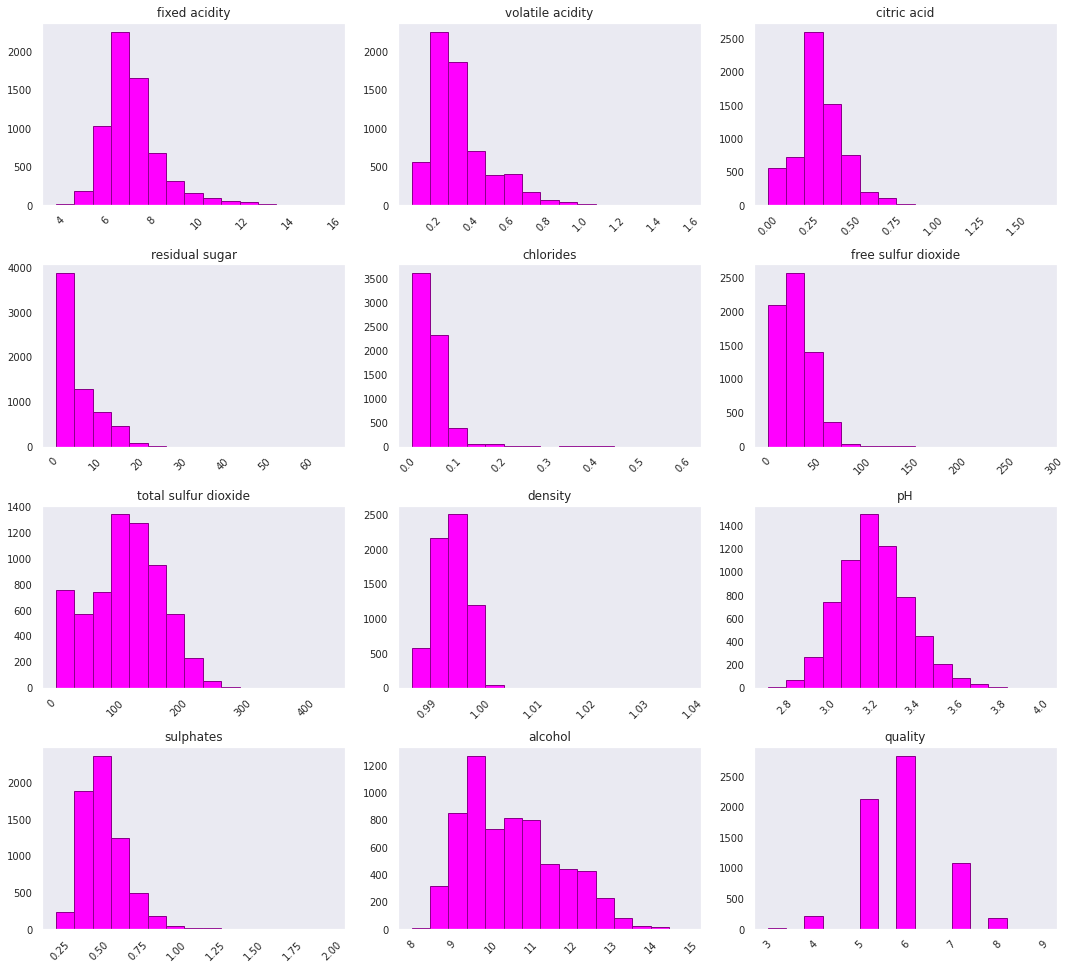

In [39]:
fig = df_wines.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [40]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


Text(0.5, 0.98, 'Combined Wine Attributes and their Correlation Heatmap')

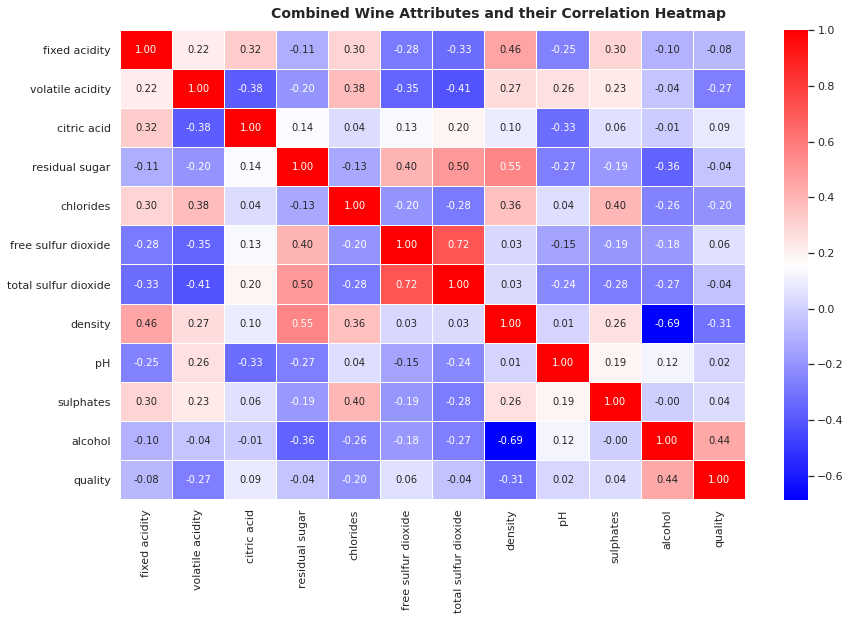

In [41]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

hm = sns.heatmap(df_wines.corr(), 
                 ax=ax,           
                 cmap="bwr", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.subplots_adjust(top=0.94)
fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

#Discrete categorical attributes

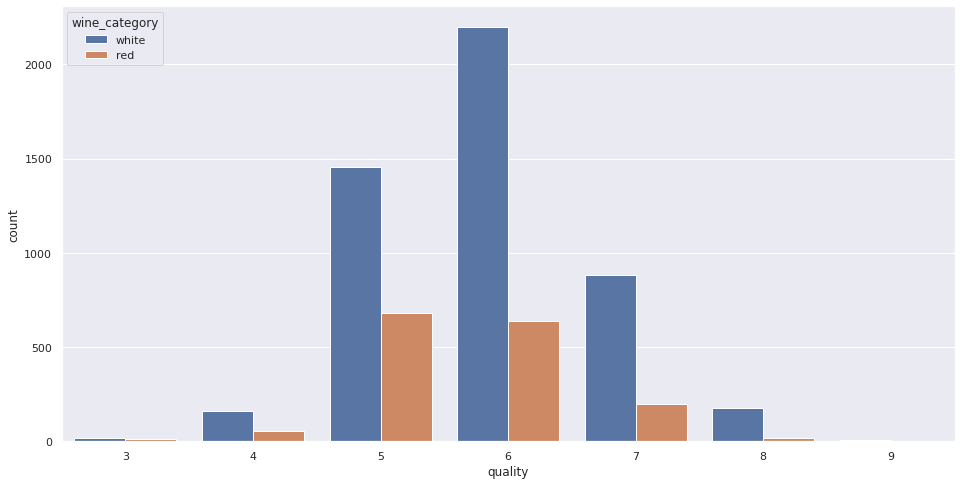

In [42]:
fig = plt.figure(figsize=(16, 8))

sns.countplot(data=df_wines, x="quality", hue="wine_category")

#3D visualization

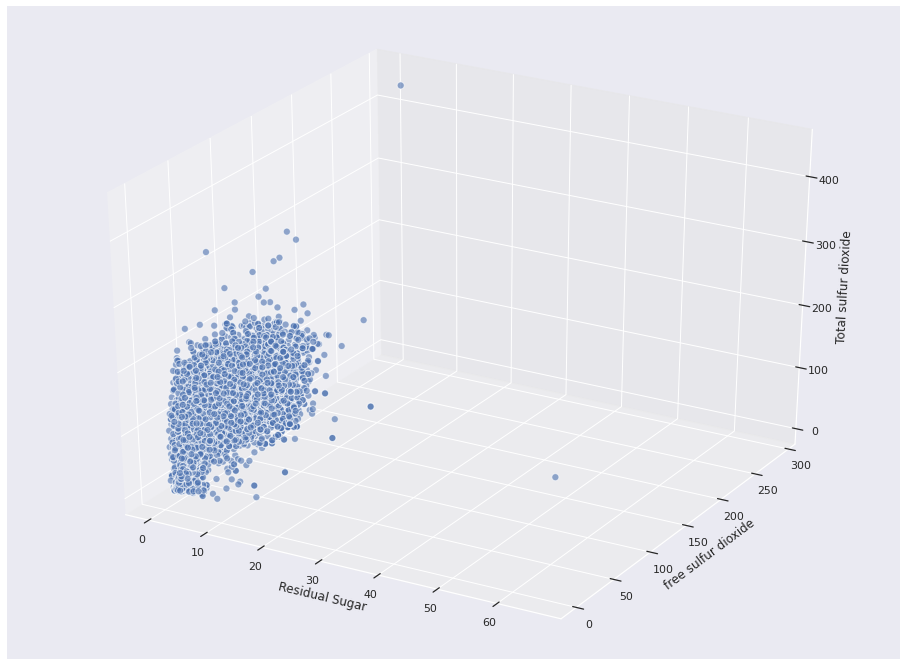

In [43]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = df_wines['residual sugar']
yscale = df_wines['free sulfur dioxide']
zscale = df_wines['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')

plt.show()

Text(0.5, 1.05, 'Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide')

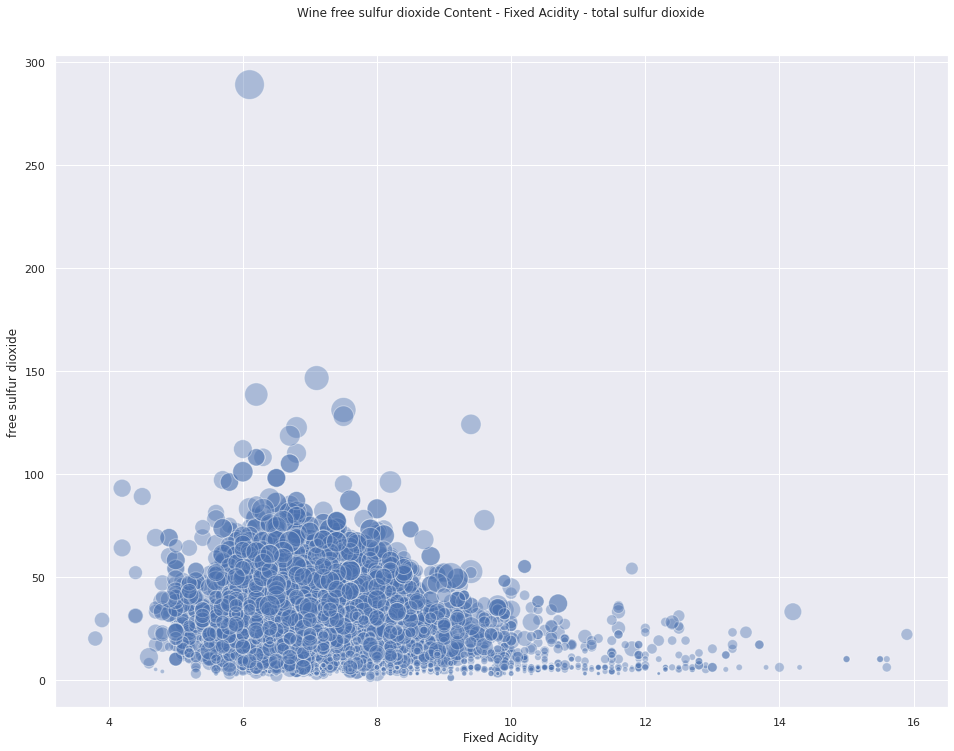

In [44]:
fig = plt.figure(figsize=(16, 12))

plt.scatter(x = df_wines['fixed acidity'], 
            y = df_wines['free sulfur dioxide'], 
            s = df_wines['total sulfur dioxide'] * 2,
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)

In [45]:
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_category',
       'quality_label'],
      dtype='object')

#Model development and evaluation

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [48]:
label_quality = LabelEncoder()

df_wines['quality_label'] = label_quality.fit_transform(df_wines['quality_label'])

In [49]:
df_wines.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
6487,6.1,0.22,0.46,1.80,0.160,34.0,74.0,0.98840,3.19,0.33,13.4,6,white,2
6488,10.3,0.50,0.42,2.00,0.069,21.0,51.0,0.99820,3.16,0.72,11.5,6,red,2
6489,6.4,0.31,0.53,8.80,0.057,36.0,221.0,0.99642,3.17,0.44,9.1,5,white,1
6490,5.9,0.26,0.24,2.40,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,white,1
6491,8.0,0.34,0.49,9.00,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,white,0
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,2
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,1
6496,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,red,1


In [50]:
x_train,x_test,y_train,y_test=train_test_split(df_wines.drop(['quality','wine_category'],axis=1),df_wines['quality_label'],test_size=0.30,random_state=42)

models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

In [52]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Accuracy': [0.9687179487179487,
  0.9723076923076923,
  0.6051282051282051,
  0.6912820512820513,
  1.0,
  1.0,
  1.0,
  1.0],
 'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB']}

In [53]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,RandomForestClassifier,1.000000
5,DecisionTree,1.000000
6,GradientBoostingClassifier,1.000000
7,GaussianNB,1.000000
1,LinearSVM,0.972308
0,LogisticRegression,0.968718
3,KNearestNeighbors,0.691282
2,rbfSVM,0.605128


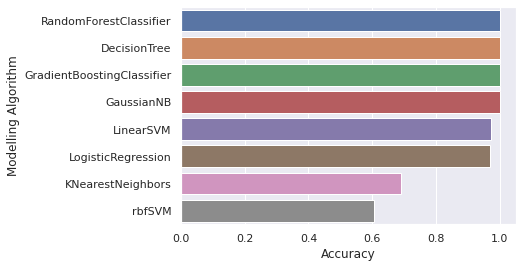

In [54]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


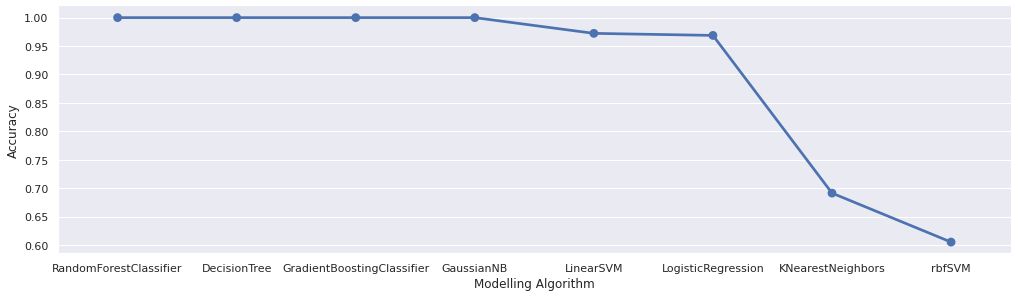

In [55]:
sns.catplot(x='Modelling Algorithm',y='Accuracy',data=acc_table,kind='point',size=4,aspect=3.5)